# Attack on Complex Networks

In [132]:
%load_ext autoreload
import os 
import time 
import random
import random
import warnings
import copy 

import igraph 
from igraph import plot 

import networkx as nx
from networkx.algorithms.shortest_paths.generic import average_shortest_path_length

import numpy as np
import pandas as pd 
import powerlaw
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

import scipy
from scipy.stats import mstats
from scipy.stats import poisson

from IPython.display import clear_output
from IPython.display import display,  Markdown

from utils.configuration_model import ConfigurationGenerator


from network_attacks import incremental_random_attack, instantaneous_random_attack 

warnings.filterwarnings("ignore", category=UserWarning)

# TODO closeness_vitality

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [42]:
def get_power_law_net(n_nodes, k, verbose=False):
    distribution = powerlaw.Power_Law(xmin=1, parameters=[k])
    degrees = distribution.generate_random(n_nodes).astype(np.int32)

    start_time = time.time()
    generator = ConfigurationGenerator(degrees)
    net = generator.get_network()
    
    if verbose:
        print("** Gen PowerLaw k=%.2f took %.3fs" % (k, time.time() - start_time))
    
    return net
              
def get_poisson_net(n_nodes, mu, verbose=False):
    distribution = poisson(mu)
    degrees = distribution.rvs(size=n_nodes)
              
    start_time = time.time()
    generator = ConfigurationGenerator(degrees)
    net = generator.get_network()
    
    if verbose:
        print("** Gen Poisson mu=%.2f took %.3fs" % (mu, time.time() - start_time))
    
    return net

In [117]:
def plot_metric_distribution(metrics_quantiles, ratios, y_label, labels, title=''):
    
    fig, ax = plt.subplots(1, 1, figsize=(7, 5))
    
    colors = cm.ocean(np.linspace(0.0, 0.7, len(metrics_quantiles)))
    
    
    for quantiles, c in zip(metrics_quantiles, colors):
        ax.plot(ratios, quantiles[:,1], '-',  color=c)
        ax.fill_between(ratios, quantiles[:,0], quantiles[:,2], color=c, alpha=0.15)
    
    ax.grid("on", alpha=0.1)
    ax.set_ylabel(y_label)
    ax.set_xlabel("Removal ratio")
    ax.set_title(title)
    if labels:
        ax.legend(labels).set_zorder(10)

    plt.tight_layout()
    plt.show()

# Random Attacks

## Instantaneous attack 

** Gen Poisson mu=4.00 took 0.089s


- Instantaneous_attack: 100%|██████████████████████████████████████████████████████████| 10/10 [06:54<00:00, 41.47s/it]


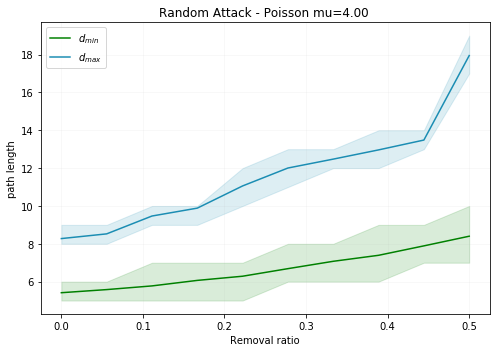

- Instantaneous_attack: 100%|██████████████████████████████████████████████████████████| 10/10 [04:45<00:00, 28.50s/it]


Final cluster sizes:
[0.634, 0.011, 0.009, 0.008, 0.006, 0.006, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.004, 0.004, 0.004, 0.004, 0.004, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001

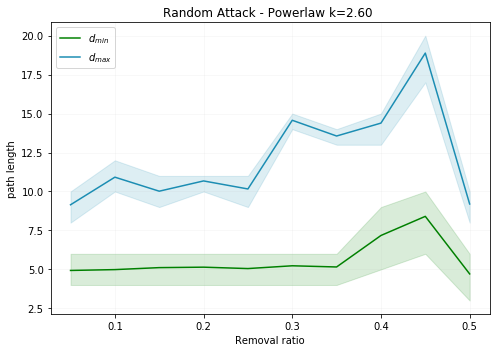

In [137]:
# Poisson 

exp_removal_ratios = np.linspace(0.0, 0.5, 10)
exp_num_nodes = [2000]
exp_mus = [4]
exp_ks = [2.6]

for n_nodes in exp_num_nodes:
    for mu in exp_mus:
        
        net = get_poisson_net(n_nodes=n_nodes, mu=mu, verbose=True)
        
        min_path, max_path, cluster_size_ratios = instantaneous_random_attack(net=net, 
                                                                              removal_rates=exp_removal_ratios,
                                                                              verbose=True) 
#         print("Final cluster sizes:")
#         print(cluster_size_ratios[-1])
        
        title = "Random Attack - Poisson mu=%.2f " % (mu)
        plot_metric_distribution([min_path, max_path], 
                                 exp_removal_ratios, 
                                 y_label="path length", 
                                 labels=[r'$d_{min}$', r'$d_{max}$'],
                                 title=title)
        
# Powerlaw
for n_nodes in exp_num_nodes:
    for k in exp_ks:
        
        net = get_power_law_net(n_nodes, k, verbose=False)
        attacked_net = net
        
        min_path, max_path, cluster_size_ratios = instantaneous_random_attack(net=net, 
                                                                              removal_rates=exp_removal_ratios,
                                                                              verbose=True) 

        print("Final cluster sizes:")
        print(cluster_size_ratios[-1])
        
        steps = int(exp_max_rate / exp_removal_rate)
        title = "Random Attack - Powerlaw k=%.2f " % (k)
        plot_metric_distribution([min_path, max_path], 
                                 np.cumsum([exp_removal_rate] * steps), 
                                 y_label="path length", 
                                 labels=[r'$d_{min}$', r'$d_{max}$'],
                                 title=title)


## Incremental Random Attacks

- Incremental_attack: 100%|████████████████████████████████████████████████████████████| 10/10 [06:41<00:00, 40.17s/it]


Final cluster sizes:
[0.844, 0.005, 0.004, 0.004, 0.003, 0.003, 0.003, 0.003, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001]


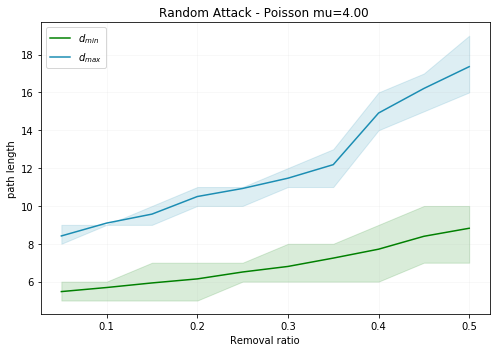

- Incremental_attack: 100%|████████████████████████████████████████████████████████████| 10/10 [04:40<00:00, 28.00s/it]


Final cluster sizes:
[0.592, 0.01, 0.005, 0.005, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,

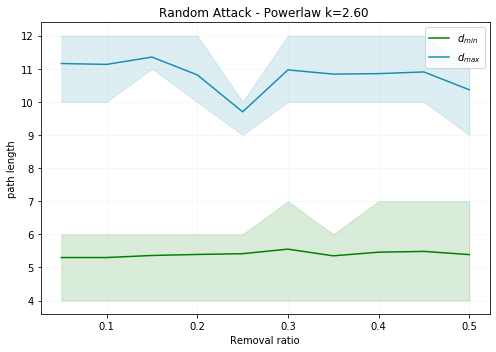

In [138]:
# Poisson 

exp_removal_rate = 0.05
exp_max_rate = 0.5
exp_num_nodes = [2000]
exp_mus = [4]
exp_ks = [2.6]

for n_nodes in exp_num_nodes:
    for mu in exp_mus:
        
        net = get_poisson_net(n_nodes=n_nodes, mu=mu, verbose=False)
        attacked_net = net
        
        min_path, max_path, cluster_size_ratios = incremental_random_attack(net=net, 
                                                                              removal_rate=exp_removal_rate,
                                                                              max_rate=exp_max_rate,
                                                                              verbose=True) 

        print("Final cluster sizes:")
        print(cluster_size_ratios[-1])
        
        steps = int(exp_max_rate / exp_removal_rate)
        title = "Random Attack - Poisson mu=%.2f " % (mu)
        plot_metric_distribution([min_path, max_path], 
                                 np.cumsum([exp_removal_rate] * steps), 
                                 y_label="path length", 
                                 labels=[r'$d_{min}$', r'$d_{max}$'],
                                 title=title)

# Powerlaw
for n_nodes in exp_num_nodes:
    for k in exp_ks:
        
        net = get_power_law_net(n_nodes, k, verbose=False)
        attacked_net = net
        
        min_path, max_path, cluster_size_ratios = incremental_random_attack(net=net, 
                                                                              removal_rate=exp_removal_rate,
                                                                              max_rate=exp_max_rate,
                                                                              verbose=True) 

        print("Final cluster sizes:")
        print(cluster_size_ratios[-1])
        
        steps = int(exp_max_rate / exp_removal_rate)
        title = "Random Attack - Powerlaw k=%.2f " % (k)
        plot_metric_distribution([min_path, max_path], 
                                 np.cumsum([exp_removal_rate] * steps), 
                                 y_label="path length", 
                                 labels=[r'$d_{min}$', r'$d_{max}$'],
                                 title=title)
